In [ ]:
##! pip install folium

In [ ]:
##! pip install pyshp

In [58]:
import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML, display
import shapefile
import sys
%matplotlib inline


# Executive Summary

The notion of red light cameras in Chicago has been a highly debated topic for several years. Chicago leads the nation in quantity if red light cameras located throughout the city as well as revenue generated from red light camera violations. The following will look to explore the relationship of red light camera violations and the location where each violation was recorded. 
   
It was relatively easy to find traffic data through Chicago Dept of Transportation, as well as HHI via census. However, neither data sets are ever presented together or side by side. This peaked my interest, considering the exact location of each red light camera in the city is readily available - why is there no resource that breaks out camera location and camera quantity by HHI of neighborhood or census tract.
   
The hypothesis for my analysis is that lower income neighborhoods will register a higher amount of violations in comparison to neighborhoods with a higher HHI. The below heatmap indicates the location of red light cameras throughout the city, and one can quickly notice that a majority of them are found further west of the heart of the city. This aligns with longitude having a higher correlation to violations than latitude, suggesting that there are more violations as one moves futher west from the lake. 
    
    
    

Variable | Description | Type of Variable
---| ---| ---
Violations | # of Violations recorded by RLC | Numerical
Latitude| Latitude coordinates | Numerical
Longitude | Longitude coordinates  | Numerical
Income | Income based on 2015 Census Tract Data  | Numerical
Predicted_Income | Predicted income of RLC coordinate  | Numerical


In [59]:
##import red light camera data 
df_cleanrlc = pd.read_csv("C:/Users/ilybangi/Desktop/Python/Final/Data/clean rlc.csv")

In [60]:
CHI_COORDINATES = (41.8781, -87.6298)
m = folium.Map(CHI_COORDINATES, zoom_start=11)
m


In [4]:
##plotting camera location on map
for index, row in df_cleanrlc.iterrows():
    folium.CircleMarker([row['LATITUDE'], row['LONGITUDE']],
                        radius=7,
                        popup=row['ADDRESS'],
                        fill_color="#3db7e4",
                       ).add_to(m)

In [5]:
CameraArr = df_cleanrlc[['LATITUDE', 'LONGITUDE']].as_matrix()

# plot heatmap
m.add_child(plugins.HeatMap(CameraArr, radius=15))
m

# Technical Analysis

The major difficulty with this analysis was merging the two data sets together. I was able to easily acquire red light camera data from 2012-2016 via Chicago Dept of Transportations website. The census data was also readiy available (limited to 2015 being the most recent set). I originally attempted to merge the two data sets via location of the red light camera and neighborhood/census tract through the use of longitudenal and latitudenal coordinates. However, due to minor variations less than ten thousanths of a decimal this became a very difficult and frustrating task.

My next approach was to run the 'training' data set (HHI by tract data) through a Random Forest Regressor. The thought process here being that I already had longitudenal and latitudenal coordinates with a corresponding income data point. Once the Random Forest Regressor ingested and was 'trained' on this data set, I introduced the second data set, the red light camera data. Here, I only had the coordinates of the red light camera locations without a HHI data point. The process here was to interpolate the HHI of the red light camera data set using the trained model based on the census HHI income data set. Given how closely related the two data sets were (longitude and latitude across the city of Chicago) my belief was that the predicted income based on red light camera locations would be within the realm of reason. 
    
After successfuly running the model and integrating the predicted income into the red light camera data set, I used several reference points to determine the accuracy. I pulled the lat/long from the census HHI data and compared against a virtual match of the lat/long from the red light camera data set to compare the delta's across the two points. I also created a histogram of the frequency of violations grouped by HHI income (by ten thousands), which ultimately supported my hypothesis. The distribution was skewed to the left, in favor of lower HHI with a long right tail. 

One potential risk/downfall of this analysis is that it does not take amount of cars passing through each intersection into account. Meaning, that an extremely busy intersection in a low HHI neighborhood could be skewing the data considerably. Next steps I would like to take with this analysis would be to incorperate traffic volume and potentially create subgroups of heavy traffic locations. 

In [61]:
bins = [0,10000, 20000, 30000, 40000, 50000,60000,70000,80000,90000,100000,110000]

In [62]:
group_names = ['10k', '20k', '30k', '40k', '50k','60k','70k','80k','90k','100k','110k']

In [63]:
categories = pd.cut(df_cleanrlc['PREDICTEDINCOME'], bins, labels=group_names)
df_cleanrlc['categories'] = pd.cut(df_cleanrlc['PREDICTEDINCOME'], bins, labels=group_names)
df_cleanrlc['INCOMEBINNED'] = pd.cut(df_cleanrlc['PREDICTEDINCOME'], bins)
categories

0       80k
1       50k
2       40k
3       60k
4       40k
5       30k
6       40k
7       50k
8       40k
9       90k
10      50k
11     110k
12      40k
13      40k
14      40k
15      40k
16     110k
17      30k
18      50k
19      40k
20      90k
21      40k
22      40k
23      90k
24      50k
25      30k
26      30k
27      40k
28      50k
29      50k
       ... 
145     50k
146     50k
147     40k
148     90k
149     50k
150     40k
151     50k
152     50k
153     80k
154     60k
155     50k
156     60k
157     40k
158     40k
159     50k
160     40k
161     40k
162     50k
163     40k
164     40k
165     80k
166     30k
167     40k
168     70k
169     40k
170     40k
171     40k
172    110k
173     50k
174     60k
Name: PREDICTEDINCOME, Length: 175, dtype: category
Categories (11, object): [100k < 10k < 110k < 20k ... 60k < 70k < 80k < 90k]

In [64]:
pd.value_counts(df_cleanrlc['categories'])

40k     60
50k     41
60k     24
30k     12
90k      9
80k      9
70k      7
100k     7
110k     6
20k      0
10k      0
Name: categories, dtype: int64

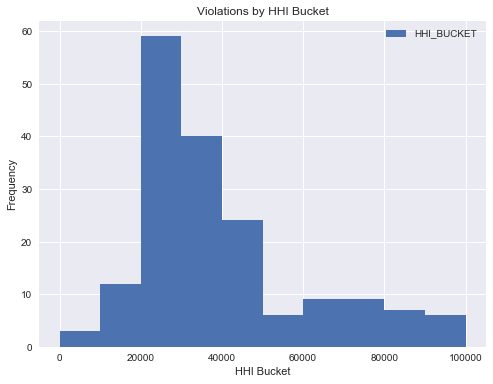

In [120]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
df_cleanrlc.HHI_BUCKET.plot (kind='hist', x='PREDICTED_INCOME' , y='VIOLATIONS', legend=True,)
plt.xlabel("HHI Bucket")    
plt.title("Violations by HHI Bucket")


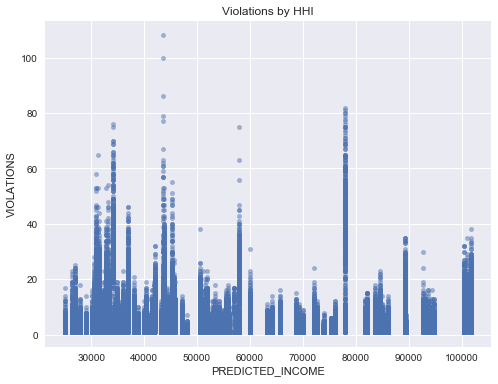

In [124]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
df.plot(kind='scatter', x='PREDICTED_INCOME', y='VIOLATIONS', alpha=.5)
plt.title("Violations by HHI")

## Hypothesis: 
 There is a relationship between number of red light camera violations and the income of the neighborhood (higher number of violations in lower income neighborhoods)


## Null Hypothesis:
 There is no relationship between number of red light camera violations and the income of the neighborhood.





## Potential Issues/Risks

Certain intersections experience more traffic/cars than others, likely skewing the total number of violations in their favor. Without having the total number of cars passing through for reference it would be difficult to normalize the data across all intersections containing a red light camera.

In [66]:
##import red light camera data 
df_raw = pd.read_csv("C:/Users/ilybangi/Desktop/Python/Final/Data/2015 RLC.csv")

In [67]:
##import hhi data
df_raw_hhi = pd.read_csv("c:/Users/ilybangi/Desktop/Python/Final/Data/2015 HHI by tract.csv")

In [68]:
##drop null values and rename data frame
df = df_raw.dropna() 
df.head()

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,CICERO AND I55,2251.0,4200 S CICERO AVENUE,11/29/2015,108,1145023.743,1876358.277,41.816729,-87.743537,"(41.81672938674739, -87.74353671247594)"
1,CICERO AND I55,2251.0,4200 S CICERO AVENUE,11/28/2015,100,1145023.743,1876358.277,41.816729,-87.743537,"(41.81672938674739, -87.74353671247594)"
2,CICERO AND I55,2251.0,4200 S CICERO AVENUE,12/1/2015,86,1145023.743,1876358.277,41.816729,-87.743537,"(41.81672938674739, -87.74353671247594)"
3,LAKE SHORE DR AND BELMONT,1413.0,400 W BELMONT AVE,4/18/2015,82,1172981.745,1921577.376,41.940241,-87.639639,"(41.94024119325571, -87.63963911427594)"
4,LAKE SHORE DR AND BELMONT,1413.0,400 W BELMONT AVE,7/11/2015,81,1172981.745,1921577.376,41.940241,-87.639639,"(41.94024119325571, -87.63963911427594)"


In [69]:
##drop null values and rename data frame
df_hhi = df_raw_hhi.dropna()
df_hhi.head()

,YEAR,GEO_NAME,GEO,INCOME,LATITUDE,LONGITUDE
0,2015,Census Tract 307.02,17031030702,48870,41.980656,-87.655104
1,2015,Census Tract 307.03,17031030703,46174,41.980051,-87.655088
2,2015,Census Tract 1606.01,17031160601,57228,41.957580,-87.702021
3,2015,Census Tract 2105.01,17031210501,41829,41.938071,-87.727155
4,2015,Census Tract 2209.02,17031220902,47627,41.920843,-87.724822


## Random Forest Decision Tree 
Create the model based on the HHI by Census tract data set, which will be used to predict the income based on lat and long of the Red Light Camera data set.

In [70]:
# Load scikit's random forest classifier library    regressor 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Load pandas
import pandas as pd

# Load numpy
import numpy as np




In [71]:
df_hhi.columns.values

array(['YEAR', 'GEO_NAME', 'GEO', 'INCOME', 'LATITUDE', 'LONGITUDE'], dtype=object)

In [72]:
df_hhi.head()

,YEAR,GEO_NAME,GEO,INCOME,LATITUDE,LONGITUDE
0,2015,Census Tract 307.02,17031030702,48870,41.980656,-87.655104
1,2015,Census Tract 307.03,17031030703,46174,41.980051,-87.655088
2,2015,Census Tract 1606.01,17031160601,57228,41.957580,-87.702021
3,2015,Census Tract 2105.01,17031210501,41829,41.938071,-87.727155
4,2015,Census Tract 2209.02,17031220902,47627,41.920843,-87.724822


In [73]:
df_hhi2 = pd.DataFrame(df_hhi, columns=df_hhi.columns.values)
df_hhi2['is_train'] = np.random.uniform(0, 1, len(df_hhi)) <= .75
df_hhi2['PRED_INCOME']= df_hhi2['INCOME']

In [74]:
##copy of the HHI by Tract data set inclusive of training column and predicted income column
df_hhi2.head()


,YEAR,GEO_NAME,GEO,INCOME,LATITUDE,LONGITUDE,is_train,PRED_INCOME
0,2015,Census Tract 307.02,17031030702,48870,41.980656,-87.655104,True,48870
1,2015,Census Tract 307.03,17031030703,46174,41.980051,-87.655088,True,46174
2,2015,Census Tract 1606.01,17031160601,57228,41.957580,-87.702021,True,57228
3,2015,Census Tract 2105.01,17031210501,41829,41.938071,-87.727155,True,41829
4,2015,Census Tract 2209.02,17031220902,47627,41.920843,-87.724822,True,47627


In [75]:
df_hhi2['INCOME'].value_counts().head()

None     4
26250    4
29375    3
19813    2
42083    2
Name: INCOME, dtype: int64

In [76]:
df = pd.DataFrame(df, columns=df.columns.values)
df['is_train'] = np.random.uniform(1, 1, len(df)) <= .75
df.head()

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,is_train
0,CICERO AND I55,2251.0,4200 S CICERO AVENUE,11/29/2015,108,1145023.743,1876358.277,41.816729,-87.743537,"(41.81672938674739, -87.74353671247594)",False
1,CICERO AND I55,2251.0,4200 S CICERO AVENUE,11/28/2015,100,1145023.743,1876358.277,41.816729,-87.743537,"(41.81672938674739, -87.74353671247594)",False
2,CICERO AND I55,2251.0,4200 S CICERO AVENUE,12/1/2015,86,1145023.743,1876358.277,41.816729,-87.743537,"(41.81672938674739, -87.74353671247594)",False
3,LAKE SHORE DR AND BELMONT,1413.0,400 W BELMONT AVE,4/18/2015,82,1172981.745,1921577.376,41.940241,-87.639639,"(41.94024119325571, -87.63963911427594)",False
4,LAKE SHORE DR AND BELMONT,1413.0,400 W BELMONT AVE,7/11/2015,81,1172981.745,1921577.376,41.940241,-87.639639,"(41.94024119325571, -87.63963911427594)",False


In [77]:
df['is_train'].value_counts().head()

False    90259
Name: is_train, dtype: int64

In [78]:
##removing the 'None' values in income from HHI data set and make it a copy
clean_hhi2 = df_hhi2[df_hhi2['INCOME']!='None'].copy()

In [79]:
## convert income column to integer 
clean_hhi2['INT_INCOME'] = clean_hhi2['INCOME'].apply(int)

In [80]:
clean_hhi2.dtypes

YEAR             int64
GEO_NAME        object
GEO              int64
INCOME          object
LATITUDE       float64
LONGITUDE      float64
is_train          bool
PRED_INCOME     object
INT_INCOME       int64
dtype: object

In [81]:
df.dtypes

INTERSECTION       object
CAMERA ID         float64
ADDRESS            object
VIOLATION DATE     object
VIOLATIONS          int64
X COORDINATE      float64
Y COORDINATE      float64
LATITUDE          float64
LONGITUDE         float64
LOCATION           object
is_train             bool
dtype: object

In [82]:
train, test = clean_hhi2[clean_hhi2['is_train']==True], clean_hhi2[clean_hhi2['is_train']==False]

In [83]:
train2, test2 = df[df['is_train']==True], df[df['is_train']==False]

In [84]:
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:', len(test))


Number of observations in the training data: 608
Number of observations in the test data: 189


In [85]:
print('Number of observations in the training data:', len(train2))
print('Number of observations in the test data:', len(test2))

Number of observations in the training data: 0
Number of observations in the test data: 90259


In [86]:
##creating features for HHI data
features = df_hhi2.columns[4:6]
features

Index(['LATITUDE', 'LONGITUDE'], dtype='object')

In [87]:
##creating features for RLC data
features2 = df.columns[7:9]
features2

Index(['LATITUDE', 'LONGITUDE'], dtype='object')

In [88]:
##create test/train for HHI data
y_train = train['INT_INCOME']
x_train = train[features]

y_test = test['INT_INCOME']
x_test = test[features]

In [89]:
##create test for RLC data
y2_train = train['INT_INCOME']
x2_train = train[features]

y2_test = test['INT_INCOME']
x2_test = test2[features2]

In [90]:
##check to make sure variables are in correct format
x_train.dtypes

LATITUDE     float64
LONGITUDE    float64
dtype: object

In [91]:
##check to make sure variables are in correct format
x_test.dtypes

LATITUDE     float64
LONGITUDE    float64
dtype: object

In [92]:
##check to make sure variables are in correct format
y_train.dtypes

dtype('int64')

In [93]:
##check to make sure variables are in correct format
x2_test.dtypes

LATITUDE     float64
LONGITUDE    float64
dtype: object

In [94]:
x2_test.count()

LATITUDE     90259
LONGITUDE    90259
dtype: int64

In [95]:
##create random forest regressor
reg = RandomForestRegressor(n_jobs=-1, min_samples_leaf=2, max_depth=5, n_estimators=2000)

In [96]:
##fit the random forest regressor to train data
reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=2000, n_jobs=-1, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [97]:
reg.score(x_train,y_train)

0.7413470336253255

In [98]:
reg.score(x_test,y_test)

0.64258019572730163

In [99]:
##interpolate RF predictor from HHI data and apply to Lat/Long of RLC data
interpole = reg.predict(x2_test)


In [100]:
##convert result of interpolation (array) into a data frame
pd.DataFrame({'PREDICTED_INCOME':interpole.tolist()})
interp=pd.DataFrame({'PREDICTED_INCOME':interpole.tolist()})
interp

,PREDICTED_INCOME
0,43475.510851
1,43475.510851
2,43475.510851
3,77975.022372
4,77975.022372
5,77975.022372
6,77975.022372
7,77975.022372
8,43475.510851
9,77975.022372


In [104]:
##convert interp df into values due to merge/join issues
interp.values

array([[ 43475.51085073],
       [ 43475.51085073],
       [ 43475.51085073],
       ..., 
       [ 38858.79272542],
       [ 53278.84600413],
       [ 55410.00472124]])

In [105]:
interp.count()

PREDICTED_INCOME    90259
dtype: int64

In [106]:
df.count()

INTERSECTION      90259
CAMERA ID         90259
ADDRESS           90259
VIOLATION DATE    90259
VIOLATIONS        90259
X COORDINATE      90259
Y COORDINATE      90259
LATITUDE          90259
LONGITUDE         90259
LOCATION          90259
is_train          90259
dtype: int64

In [107]:
##adding interpolated "predicted income" into RLC data set as column 'PREDICTED_INCOME'
df['PREDICTED_INCOME'] = interp.values

In [108]:
df.describe()

,CAMERA ID,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,PREDICTED_INCOME
count,90259.000000,90259.000000,9.025900e+04,9.025900e+04,90259.000000,90259.000000,90259.000000
mean,1855.270211,5.017350,1.157746e+06,1.898416e+06,41.876996,-87.696299,49583.711312
std,492.851000,5.889828,1.406856e+04,3.096435e+04,0.085115,0.051228,19993.541275
min,1002.000000,1.000000,1.125717e+06,1.825911e+06,41.677721,-87.812781,25108.617516
25%,1434.000000,2.000000,1.147407e+06,1.869738e+06,41.798558,-87.734506,33212.794060
50%,1844.000000,3.000000,1.158976e+06,1.907723e+06,41.902714,-87.690394,43683.932766
75%,2302.000000,6.000000,1.167202e+06,1.921821e+06,41.940909,-87.662294,55410.004721
max,2751.000000,108.000000,1.191188e+06,1.947754e+06,42.012371,-87.575293,101811.824101


In [109]:
## check dataframe to ensure all values accounted for 
df.tail()

,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,is_train,PREDICTED_INCOME
96083,PULASKI AND FULLERTON,1484.0,4000 W FULLERTON AVE,5/3/2015,1,1149303.082,1915695.275,41.924593,-87.726819,"(41.92459302175305, -87.7268192684032)",False,44998.722699
96084,LAWRENCE AND WESTERN,1192.0,4800 N WESTERN AVENUE,1/29/2015,1,1159459.622,1931821.343,41.968641,-87.689054,"(41.96864072747715, -87.6890542408374)",False,69941.529868
96085,PULASKI AND 79TH,2494.0,4000 W 79TH STREET,11/20/2015,1,1151074.116,1851966.830,41.749679,-87.721978,"(41.74967935883473, -87.72197834524168)",False,38858.792725
96086,ADDISON AND HARLEM,1593.0,7200 W ADDISON,1/29/2015,1,1127417.488,1923123.408,41.945373,-87.807070,"(41.94537335809189, -87.80707032561135)",False,53278.846004
96087,LAWRENCE AND CICERO,1041.0,4800 N CICERO AVE,11/24/2015,1,1143464.652,1931490.552,41.968048,-87.747876,"(41.968048007293845, -87.74787598468126)",False,55410.004721


In [110]:
df


,INTERSECTION,CAMERA ID,ADDRESS,VIOLATION DATE,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,is_train,PREDICTED_INCOME
0,CICERO AND I55,2251.0,4200 S CICERO AVENUE,11/29/2015,108,1145023.743,1876358.277,41.816729,-87.743537,"(41.81672938674739, -87.74353671247594)",False,43475.510851
1,CICERO AND I55,2251.0,4200 S CICERO AVENUE,11/28/2015,100,1145023.743,1876358.277,41.816729,-87.743537,"(41.81672938674739, -87.74353671247594)",False,43475.510851
2,CICERO AND I55,2251.0,4200 S CICERO AVENUE,12/1/2015,86,1145023.743,1876358.277,41.816729,-87.743537,"(41.81672938674739, -87.74353671247594)",False,43475.510851
3,LAKE SHORE DR AND BELMONT,1413.0,400 W BELMONT AVE,4/18/2015,82,1172981.745,1921577.376,41.940241,-87.639639,"(41.94024119325571, -87.63963911427594)",False,77975.022372
4,LAKE SHORE DR AND BELMONT,1413.0,400 W BELMONT AVE,7/11/2015,81,1172981.745,1921577.376,41.940241,-87.639639,"(41.94024119325571, -87.63963911427594)",False,77975.022372
5,LAKE SHORE DR AND BELMONT,1413.0,400 W BELMONT AVE,3/28/2015,80,1172981.745,1921577.376,41.940241,-87.639639,"(41.94024119325571, -87.63963911427594)",False,77975.022372
6,LAKE SHORE DR AND BELMONT,1413.0,400 W BELMONT AVE,8/7/2015,80,1172981.745,1921577.376,41.940241,-87.639639,"(41.94024119325571, -87.63963911427594)",False,77975.022372
7,LAKE SHORE DR AND BELMONT,1413.0,400 W BELMONT AVE,6/13/2015,79,1172981.745,1921577.376,41.940241,-87.639639,"(41.94024119325571, -87.63963911427594)",False,77975.022372
8,CICERO AND I55,2251.0,4200 S CICERO AVENUE,12/13/2015,79,1145023.743,1876358.277,41.816729,-87.743537,"(41.81672938674739, -87.74353671247594)",False,43475.510851
9,LAKE SHORE DR AND BELMONT,1413.0,400 W BELMONT AVE,8/29/2015,78,1172981.745,1921577.376,41.940241,-87.639639,"(41.94024119325571, -87.63963911427594)",False,77975.022372


In [111]:
##create a copy of the dataframe for exploratoring data/correlation/confusion matrix
df_copy = df

In [112]:
df_copy.corr()

,CAMERA ID,VIOLATIONS,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,is_train,PREDICTED_INCOME
CAMERA ID,1.000000,0.096980,0.462845,-0.907350,-0.907383,0.451328,NaN,-0.462981
VIOLATIONS,0.096980,1.000000,0.188970,-0.078816,-0.079326,0.189269,NaN,0.040752
X COORDINATE,0.462845,0.188970,1.000000,-0.497310,-0.499841,0.999890,NaN,0.049691
Y COORDINATE,-0.907350,-0.078816,-0.497310,1.000000,0.999996,-0.484436,NaN,0.486592
LATITUDE,-0.907383,-0.079326,-0.499841,0.999996,1.000000,-0.486988,NaN,0.485609
LONGITUDE,0.451328,0.189269,0.999890,-0.484436,-0.486988,1.000000,NaN,0.058466
is_train,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PREDICTED_INCOME,-0.462981,0.040752,0.049691,0.486592,0.485609,0.058466,NaN,1.000000


In [113]:
df_corr = df_copy.drop(df_copy.columns[[0, 1,2,5,6,9,10]], axis=1)

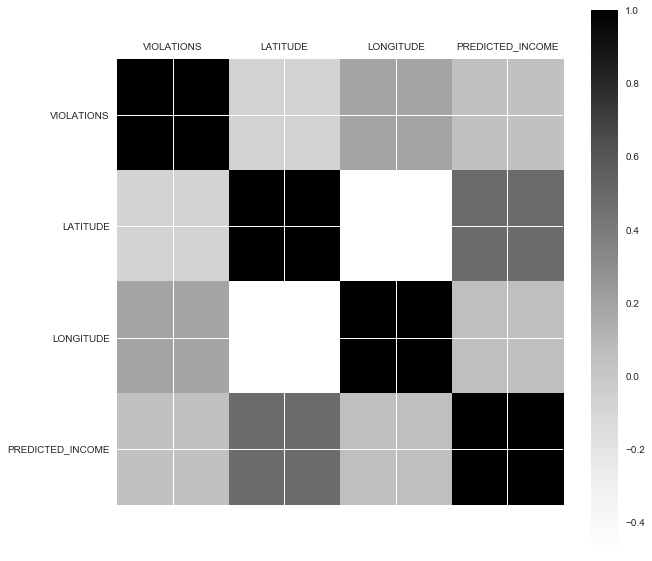

In [114]:

# visualize correlation matrix using a heatmap
#change the font size and figure size if you have problem reading the labels
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 10


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(df_corr.corr())
fig.colorbar(cax)
ax.set_xticks(range(len(df_corr.corr().index)))
ax.set_yticks(range(len(df_corr.corr().index)))
ax.set_xticklabels(df_corr.corr().index)
ax.set_yticklabels(df_corr.corr().index)

plt.show()